In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.0.0

Found existing installation: rpy2 3.5.5
Uninstalling rpy2-3.5.5:
  Successfully uninstalled rpy2-3.5.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.0.0-py3-none-any.whl size=106519 sha256=16e8d13ecc5220bd500f7edf21431b5ed03044f4160bc666fb5578095fcf7f49
  Stored in directory: /root/.cache/pip/wheels/cf/c3/f6/e528c1472dbc76917f525029a132cd7f61efc97b3d8ba7085f
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5077 sha256=29b94d9bc3f8b1be0e17ef4c584b83853d20a53d12d55feaa2c9b99794fe0b15
  Stored in directory: /root/.cache/pip/wheels/a7/bd/0d/d95b629ee4a7368830202858e45ac76cd837a42cafa50da81e
Successfully built rpy2 simplegeneric


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%load_ext rpy2.ipython


Mounted at /content/drive


/usr/local/lib/python3.9/dist-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version. The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [ ]:
# drive.flush_and_unmount()

In [29]:
%%R
# data <- read.csv("/content/drive/My Drive/Colab Notebooks/R/task2/StudentsPerformance.csv")
data <- read.csv("/content/drive/MyDrive/Colab Notebooks/R/task3/flight_statistics.csv")
head(data)

  Transport.weight..tons Speed..km.h Fuel.consumption..l.100.km
1                  19.75       67.08                      22.99
2                  20.00       63.40                      25.32
3                  20.18       69.54                      23.16
4                  20.33       66.83                      22.72
5                  21.00       67.60                      22.86
6                  21.20       68.84                      22.67


In [30]:
%%R
names(data)

[1] "Transport.weight..tons"     "Speed..km.h"                "Fuel.consumption..l.100.km"


In [31]:
%%R
summary(data)

 Transport.weight..tons  Speed..km.h    Fuel.consumption..l.100.km
 Min.   :19.75          Min.   :56.55   Min.   :21.87             
 1st Qu.:28.07          1st Qu.:68.33   1st Qu.:25.85             
 Median :33.29          Median :70.70   Median :27.80             
 Mean   :31.68          Mean   :70.51   Mean   :27.72             
 3rd Qu.:35.43          3rd Qu.:73.10   3rd Qu.:29.69             
 Max.   :40.00          Max.   :80.40   Max.   :34.59             


In [32]:
%%R
options(width = 1000)
cor_matrix <- cor(data[,1:3])
cor_matrix

                           Transport.weight..tons Speed..km.h Fuel.consumption..l.100.km
Transport.weight..tons                 1.00000000  0.01851334                  0.7210005
Speed..km.h                            0.01851334  1.00000000                 -0.1376828
Fuel.consumption..l.100.km             0.72100051 -0.13768282                  1.0000000


In [40]:
%%R
x <- data$Transport.weight..tons
y <- data$Fuel.consumption..l.100.km

In [43]:
%%R
model <- lm(y ~ x, data = data)
summary(model)


Call:
lm(formula = y ~ x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5231 -1.1680  0.0282  1.1854  5.6093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.64584    0.85448   17.14   <2e-16 ***
x            0.41257    0.02667   15.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.892 on 221 degrees of freedom
Multiple R-squared:  0.5198,	Adjusted R-squared:  0.5177 
F-statistic: 239.3 on 1 and 221 DF,  p-value: < 2.2e-16



In [46]:
%%R
r_squared <- summary(model)$r.squared
sprintf("Koefficient determination: %0.3f", r_squared)

[1] "Koefficient determination: 0.520"


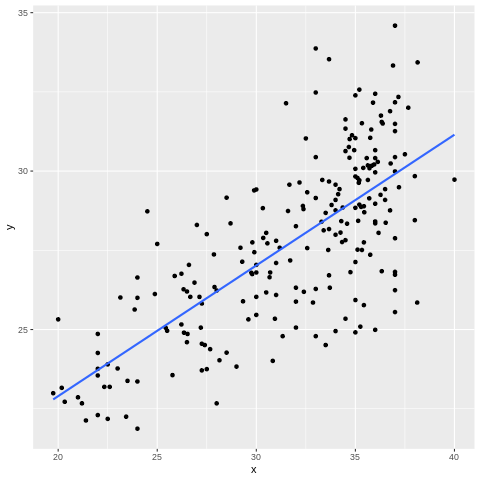

In [47]:
%%R
library(ggplot2)

ggplot(data, aes(x = x, y = y)) + geom_point() + geom_smooth(method = "lm", se = FALSE)